# Data Pre-Processing

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import seaborn as sns

# Loading dataset
df = pd.read_excel('/Users/sukanya/Documents/Alziemers Multi Modal/Dataset/FINAL.xlsx')

X = df.drop(columns=['ID', 'Dementia_Category'])
y = df['Dementia_Category']

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=50)

# Training
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest")
print(f"Accuracy: {accuracy_rf}")
print(report_rf)

Random Forest
Accuracy: 0.9950248756218906
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        66

    accuracy                           1.00       201
   macro avg       0.98      0.99      0.98       201
weighted avg       1.00      1.00      1.00       201



# Random Forest Classifier + Boosting Algorithms

## AdaBoost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

# StackAdaBoosting and Gradient Boosting
stacked_model = StackingClassifier(estimators=[
    ('ada', AdaBoostClassifier())
], final_estimator=RandomForestClassifier())

stacked_model.fit(X_train_scaled, y_train)
y_pred_stacked = stacked_model.predict(X_test_scaled)

print("Stacked Gradient Boosting and AdaBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stacked)}")
print(classification_report(y_test, y_pred_stacked))

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebre

Stacked Gradient Boosting and AdaBoost Results:
Accuracy: 0.9502487562189055
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        23
           1       0.00      0.00      0.00        10
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        66

    accuracy                           0.95       201
   macro avg       0.67      0.75      0.71       201
weighted avg       0.92      0.95      0.93       201



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


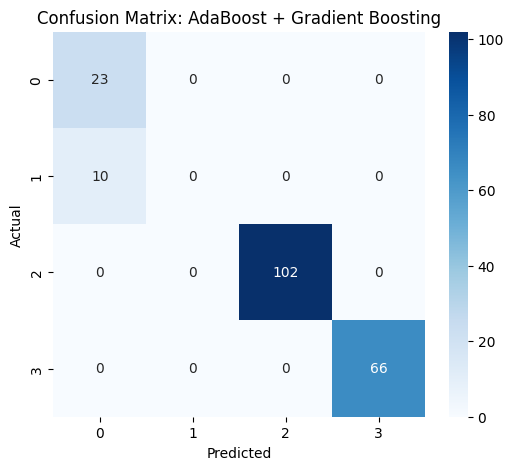

In [39]:
# Confusion Matrix for AdaBoost + Gradient Boosting
cm_ada_gb = confusion_matrix(y_test, y_pred_stacked)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada_gb, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix: AdaBoost + Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

# Stacking Gradient Boosting and Random Forest 
stacked_model = StackingClassifier(estimators=[
    ('gb', GradientBoostingClassifier())
], final_estimator=RandomForestClassifier())

stacked_model.fit(X_train_scaled, y_train)
y_pred_stacked = stacked_model.predict(X_test_scaled)

print("Stacked Random Forest and Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stacked)}")
print(classification_report(y_test, y_pred_stacked))

Stacked Random Forest and Gradient Boosting Results:
Accuracy: 0.9800995024875622
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.91      1.00      0.95        10
           2       1.00      0.96      0.98       102
           3       0.96      1.00      0.98        66

    accuracy                           0.98       201
   macro avg       0.97      0.99      0.98       201
weighted avg       0.98      0.98      0.98       201



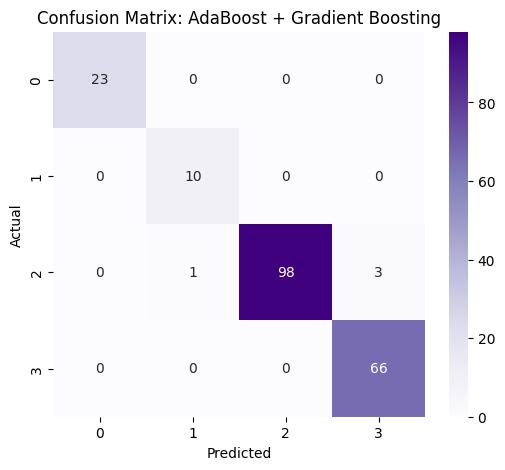

In [47]:
# Confusion Matrix
cm_ada_gb = confusion_matrix(y_test, y_pred_stacked)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada_gb, annot=True, fmt='g', cmap='Purples')
plt.title('Confusion Matrix: AdaBoost + Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## XGboost

In [40]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

# Stacking Random Forest and XGBoost
xgb_clf = xgb.XGBClassifier()
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('xgb', xgb_clf)
])

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

print("Voting Classifier with Random Forest and XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))


Voting Classifier with Random Forest and XGBoost Results:
Accuracy: 0.9950248756218906
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        66

    accuracy                           1.00       201
   macro avg       0.98      0.99      0.98       201
weighted avg       1.00      1.00      1.00       201



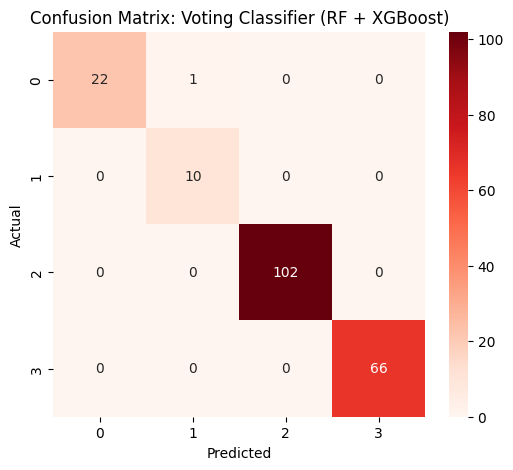

In [41]:
# Confusion Matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_voting, annot=True, fmt='g', cmap='Reds')
plt.title('Confusion Matrix: Voting Classifier (RF + XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Comparision of Boosters:**

| Metric/Model                 | RF + AdaBoost | RF + Gradient Boosting | RF + XGBoost |
|-----------------------|-----------------------------------------|-------------------------------|---------------------------------|
| **Accuracy**           | 0.9502                                  | 0.9801                        | 0.9950                          |
| **Precision**| 0.67                                    | 0.97                          | 0.98                            |
| **Recall**   | 0.75                                    | 0.99                          | 0.99                            |
| **F1-Score** | 0.71                                    | 0.98                          | 0.98                            |

## Performance-wise order of the Boosters
### 1. XGBoost
### 2. Gradient Boosting
### 3. AdaBoost